# This is a Jupyter Notebook for the "Big" Thermal Cycling:
- 10 Cycles of orbit
- UI-Curve and Spectra every 2 minutes
- Temperature could be not accuate

In [1]:
import numpy as np
from plot_module.Spectra import Spectroscopy
from plot_module.solsim_analyzer import solarSimulator
from plot_module.tc_analyzer import ThermalCycling
import matplotlib.pyplot as plt

## Toolbox for Pre-view of the data(Toolbox to sort the file, don't execute when not needed!!!)

In [5]:
preCyclingFolder = '/Users/ruodongyang/Documents/Resilio_Sync/TUM Master Physik/Pervoskite Space(Master)/Data/ThermalCycling/29072025/Cycle10-20'
preFolderSort = ThermalCycling(folderPath=preCyclingFolder)
preFolderSort.sortData()

## Now try to analyze one of the pixels:
1. Import the folder for different pixels
2. Load the data(here only with one of the pixels)

In [2]:
pixel1 = '/Users/ruodongyang/Documents/Resilio_Sync/TUM Master Physik/Pervoskite Space(Master)/Data/ThermalCycling/29072025/Cycle1_20/px1'
pixel2 = '/Users/ruodongyang/Documents/Resilio_Sync/TUM Master Physik/Pervoskite Space(Master)/Data/ThermalCycling/29072025/Cycle1_20/px2'
pixel3 = '/Users/ruodongyang/Documents/Resilio_Sync/TUM Master Physik/Pervoskite Space(Master)/Data/ThermalCycling/29072025/Cycle1_20/px3'
pixel4 = '/Users/ruodongyang/Documents/Resilio_Sync/TUM Master Physik/Pervoskite Space(Master)/Data/ThermalCycling/29072025/Cycle1_20/px4'
pixel5 = '/Users/ruodongyang/Documents/Resilio_Sync/TUM Master Physik/Pervoskite Space(Master)/Data/ThermalCycling/29072025/Cycle1_20/px5'
pixel6 = '/Users/ruodongyang/Documents/Resilio_Sync/TUM Master Physik/Pervoskite Space(Master)/Data/ThermalCycling/29072025/Cycle1_20/px6'

pxanalyzer = solarSimulator(folderPath=pixel6)
pxanalyzer.loadFolderData_Cycling()

px1analyzer = solarSimulator(folderPath=pixel1)
px2analyzer = solarSimulator(folderPath=pixel2)
px3analyzer = solarSimulator(folderPath=pixel3)
px4analyzer = solarSimulator(folderPath=pixel4)
px5analyzer = solarSimulator(folderPath=pixel5)
px1analyzer.loadFolderData_Cycling()
px2analyzer.loadFolderData_Cycling()
px3analyzer.loadFolderData_Cycling()
px4analyzer.loadFolderData_Cycling()
px5analyzer.loadFolderData_Cycling()

Line 6: # Measured Temperature: 70.04 C
[-1.02212612 -2.46188532 -3.54240184 -4.33744677 -4.89584161 -5.34388407
 -5.67389118 -5.81278897 -5.9175204  -6.03860954 -6.03091209 -5.87535639
 -5.78535434 -5.78753991 -5.69567542 -5.62858683 -5.62687659 -5.59801982
 -5.44067228 -5.27772706 -5.22289281 -5.15471576 -5.07922152 -4.91726392
 -4.83002385 -4.71087669 -4.53191792 -4.44759616 -4.40072021 -4.25637015
 -4.11988823 -3.98260928 -3.89982588 -3.77235014 -3.66105567 -3.5846537
 -3.48167739 -3.34057759 -3.23263258 -3.13629278 -3.02725634 -2.88788026
 -2.79365854 -2.69722504 -2.57319519 -2.40950273 -2.29633281 -2.20659743
 -2.10420844 -1.97007371 -1.88135411 -1.78591625 -1.64629111 -1.52317785
 -1.41803584 -1.30197379 -1.18559477 -1.07879596 -0.96326432 -0.84741878
 -0.72412297 -0.60962428 -0.49561192 -0.37801029 -0.2641439  -0.15007204
 -0.03346917  0.08290378  0.19841659  0.31792494  0.43317514  0.5442493
  0.65914058  0.78216667  0.89286347  0.99989066  1.12665906  1.25168193
  1.35331408 

### Test plot:

Text(0.5, 1.0, 'The PCE of the pixel 6')

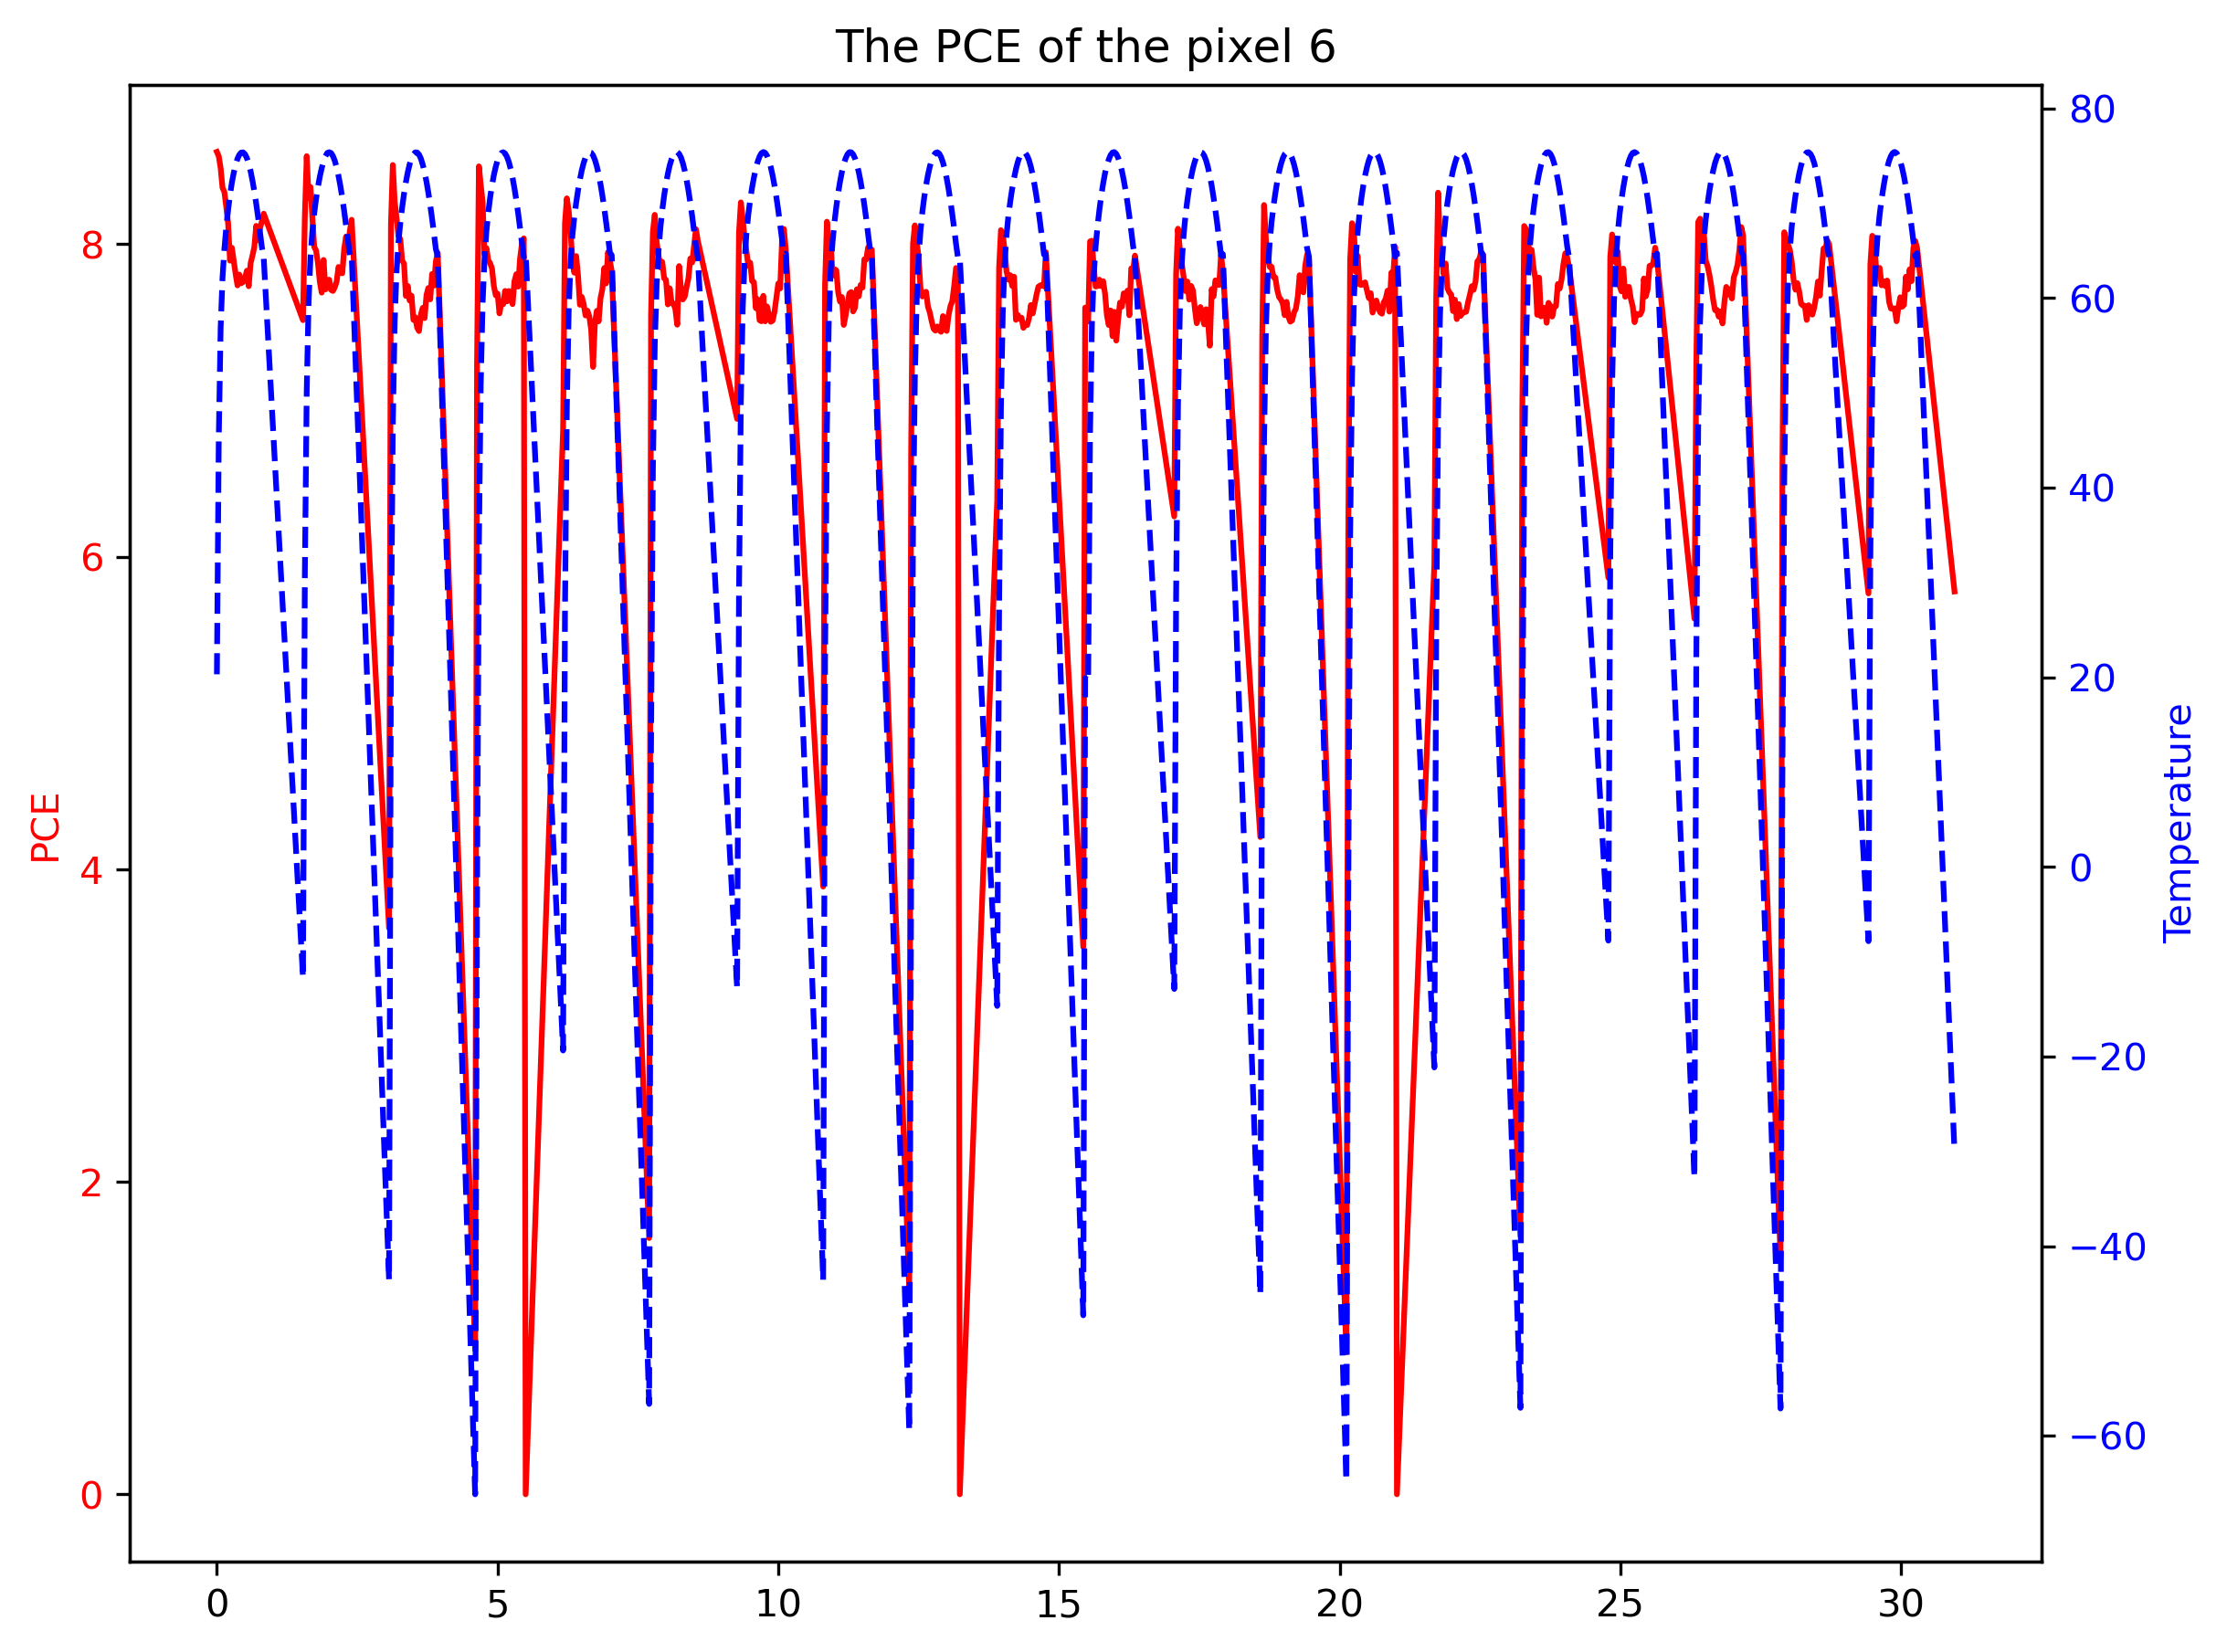

In [3]:
fig, ax1 = plt.subplots(figsize=(9, 7), dpi = 300)
ax1.plot(pxanalyzer.timestampAbsH, pxanalyzer.PCE, 'r-', label='PCE')
ax1.set_ylabel('PCE', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# 创建第二个 y 轴（右边）
ax2 = ax1.twinx()
ax2.plot(pxanalyzer.timestampAbsH, pxanalyzer.temperature, 'b--', label='Temperature')
ax2.set_ylabel('Temperature', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# 添加标题
plt.title("The PCE of the pixel 6")

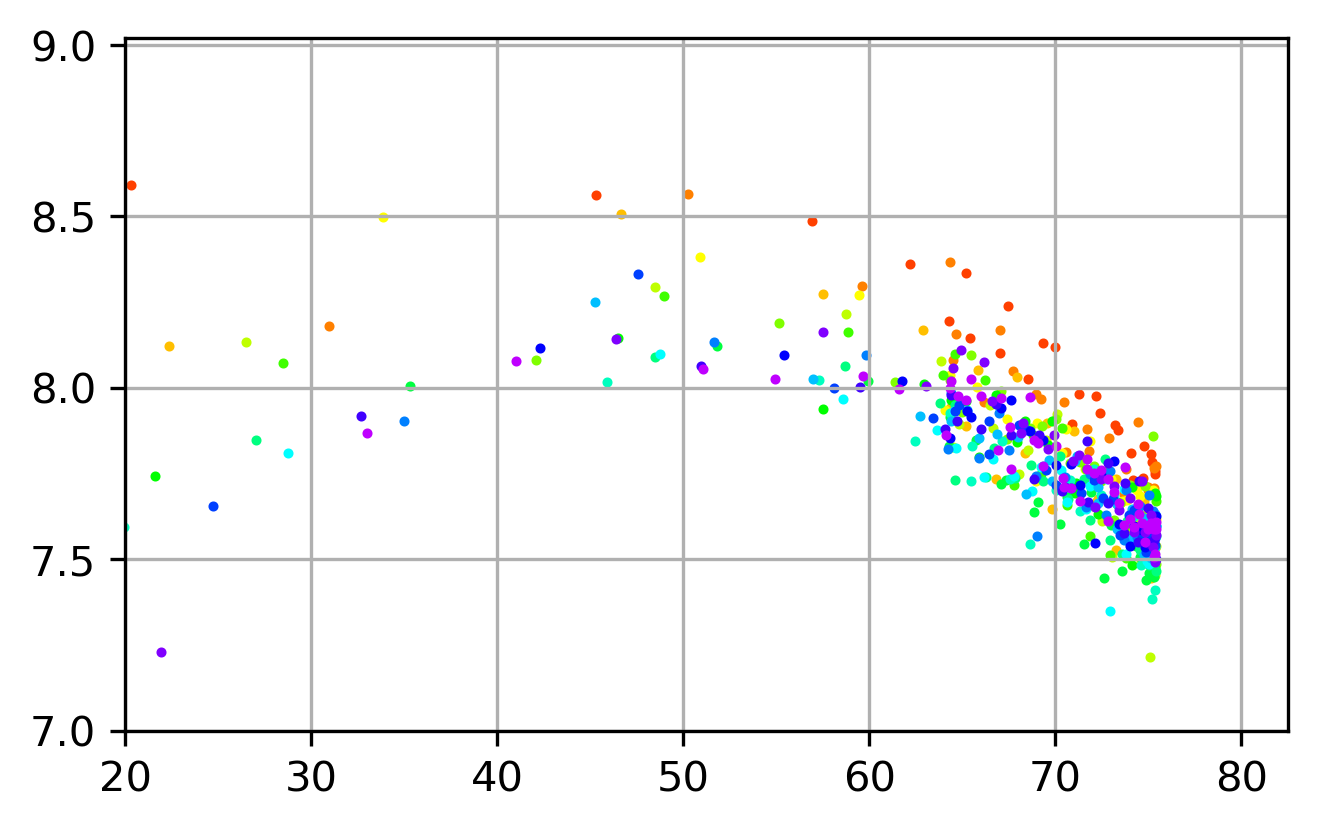

In [4]:
#Try to separate the cycles:
rainbow_colors = [
    '#FF0000',  # Red
    '#FF4000',  # Red-Orange
    '#FF8000',  # Orange
    '#FFBF00',  # Yellow-Orange
    '#FFFF00',  # Yellow
    '#BFFF00',  # Yellow-Green
    '#80FF00',  # Green-Yellow
    '#40FF00',  # Lime Green
    '#00FF00',  # Green
    '#00FF40',  # Green-Cyan
    '#00FF80',  # Spring Green
    '#00FFBF',  # Aqua
    '#00FFFF',  # Cyan
    '#00BFFF',  # Deep Sky Blue
    '#0080FF',  # Dodger Blue
    '#0040FF',  # Royal Blue
    '#0000FF',  # Blue
    '#4000FF',  # Indigo
    '#8000FF',  # Violet
    '#BF00FF',  # Magenta
    '#BF00FF'
]

plt.figure(figsize = (5,3), dpi = 300)
cycleNum = np.array(pxanalyzer.cycleNum)
temperature = np.array(pxanalyzer.temperature)
PCE = np.array(pxanalyzer.PCE)
for i in range(1, 21):
    #print(pxanalyzer.cycleNum)
    mask = (cycleNum == i)
    #print(mask)
    tempM = temperature[mask]
    PCEM = PCE[mask]
    #print(tempM)
    plt.scatter(tempM, PCEM, s = 2, color = rainbow_colors[i])    
plt.xlim(20,)
plt.ylim(7,)
plt.grid()

Text(0, 0.5, 'Temp')

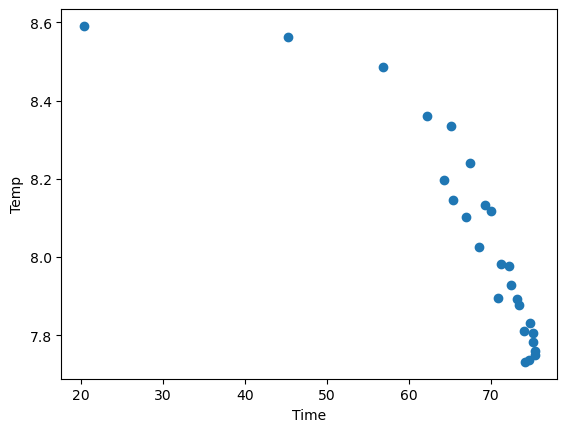

In [ ]:
temperature = np.array(pxanalyzer.temperature)
timestamp = np.array(pxanalyzer.timestampAbsH)
cycleNum = np.array(pxanalyzer.cycleNum)
PCE = np.array(pxanalyzer.PCE)
mask = cycleNum == 1

timestamp_M = timestamp[mask]
temperature_M = temperature[mask]
PCE_M = PCE[mask]

plt.scatter(temperature_M, PCE_M)
plt.xlabel("Time")
plt.ylabel("Temp")
plt.grid()
#print(mask)
#print(pxanalyzer.cycleNum)